# Ketan Shah
# Ankit Sigroha
# National Summary

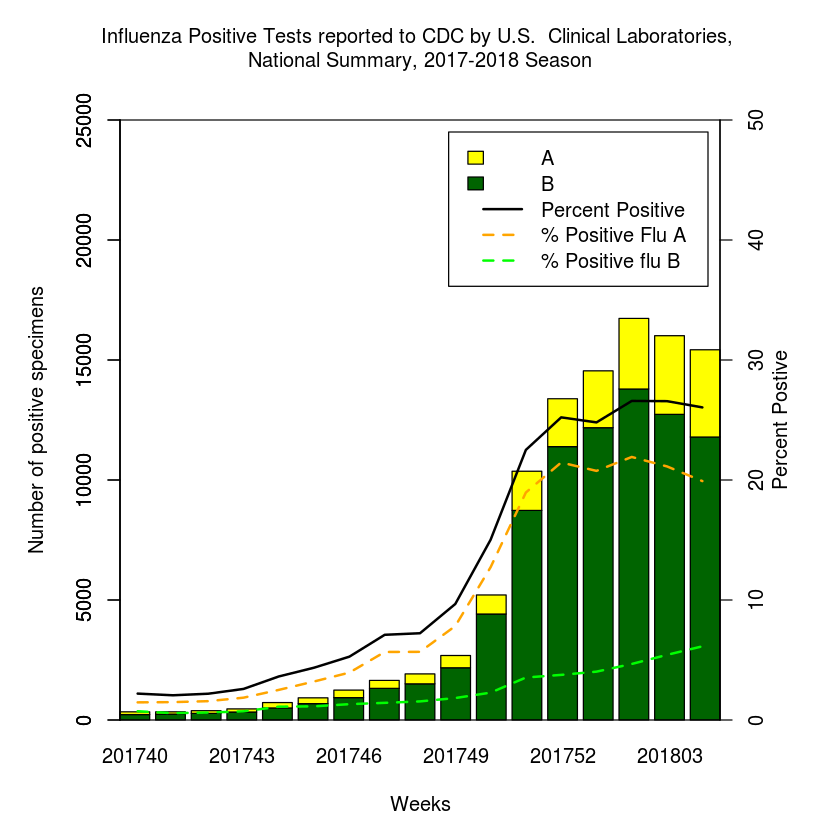

In [389]:
fluPosData<-read.csv('/home/ketan/Lab1EDA/InfluenzaPositiveTest.csv')

samples<- subset(fluPosData, select=c(Total.A, Total.B))
totalPos<-fluPosData$X..Positive
PerAPos<-fluPosData$Percent.Positive.A
PerBPos<-fluPosData$Percent.Positive.B

par(yaxs="i",xaxs="i")
par(mai=c(1,1,1,1))
y <- barplot(t(as.matrix(samples)), col=c("darkgreen", "yellow"), 
             ylim=c(0, 25000),names.arg= fluPosData$Week, 
             ylab="Number of positive specimens", xlab="Weeks")
axis(2, tick=TRUE)
par(new=TRUE)
plot(totalPos, type="l", col="black", ylab="", xlab="", axes=FALSE, ylim=c(0,50), xlim=c(0.5,17.5), lwd=2)
par(new=TRUE)
axis(4, at=c(0,10,20,30,40,50), tick=TRUE, labels=TRUE)

par(new=TRUE)
lines(PerAPos, col="orange", lty=2, lwd=2)
lines(PerBPos, col="green", lty=2, lwd=2)
par(new=TRUE)

mtext("Influenza Positive Tests reported to CDC by U.S.  Clinical Laboratories, \nNational Summary, 2017-2018 Season\n\n", side=3)
mtext("Percent Postive", side=4, line= 2)

legend("topright", inset=0.02, c("A","B", "Percent Positive", "% Positive Flu A", "% Positive flu B"), 
       col=c("yellow", "darkgreen", "black", "orange", "green"), fill= c("yellow", "darkgreen", NA,NA,NA), border=c("black","black", NA,NA,NA),
       lty=c(0,0,1,2,2), lwd=c(0,0,2,2,2),
      )


box()




# Problem 2

Week,A.H3N2v,A.H1N1.pdm09,AH3,A.unable.to.sub.type,A.Subtyping.not.performed,B,BVIC,BYAM,Total.Tested
201740,1,13,121,0,3,5,0,16,990
201741,0,14,142,0,1,6,4,11,988
201742,0,14,173,0,0,2,1,11,1179
201743,0,26,173,0,4,8,1,20,1334
201744,0,23,240,0,2,17,3,32,1474
201745,0,28,314,0,1,12,4,30,1503
201746,0,56,398,0,2,34,4,59,1808
201747,0,41,482,0,0,12,5,58,1556
201748,1,61,752,0,10,27,8,95,2248
201749,0,68,960,0,7,38,14,86,2516


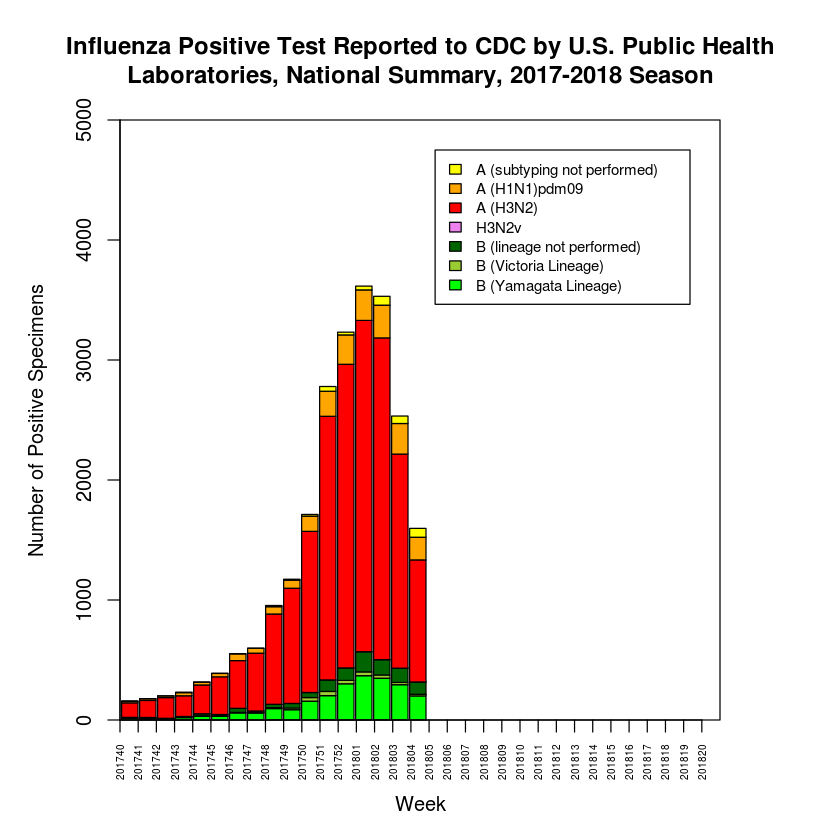

In [388]:
posTested <- read.csv('/home/ketan/Lab1EDA/PosTested.csv')
posTested

samples<-subset(posTested, select=c(BYAM, BVIC, B, A.H3N2v, AH3,A.H1N1.pdm09, A.Subtyping.not.performed))
par(yaxs="i",xaxs="i")
par(mai=c(1,1,1,1))

extra<-seq(201805, 201820, 1)
barplot(t(as.matrix(samples)), width=0.9, space=0.1, 
        col=c( "green", "yellowgreen", "darkgreen","violet", "red", "orange", "yellow"), 
        xaxt ='n', xlim = c(0,33), ylim=c(0,5000), ylab="Number of Positive Specimens", xlab="Week")
axis(1,seq(0,32,1),append(posTested$Week, extra), las=2, cex.axis=0.5)
title(main="Influenza Positive Test Reported to CDC by U.S. Public Health\nLaboratories, National Summary, 2017-2018 Season")
legend("topright", inset=0.05, c("A (subtyping not performed)", "A (H1N1)pdm09","A (H3N2)", "H3N2v", "B (lineage not performed)", "B (Victoria Lineage)", "B (Yamagata Lineage)"), fill = c("yellow", "orange", "red", "violet", "darkgreen", "yellowgreen", "green"), cex=0.75)
box()


# Influenza stats Pie chart

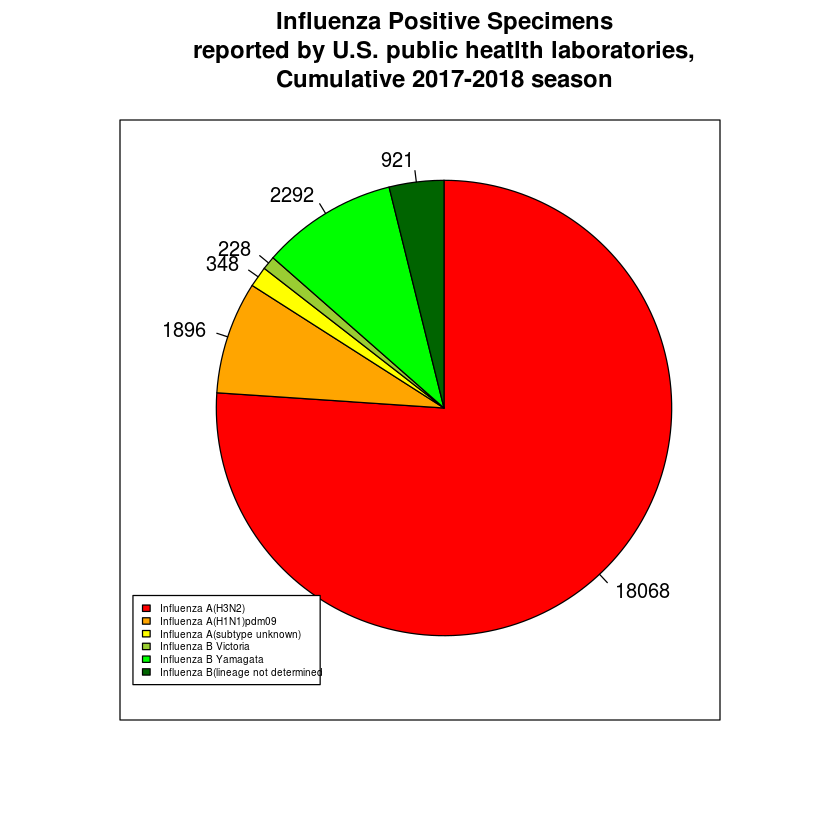

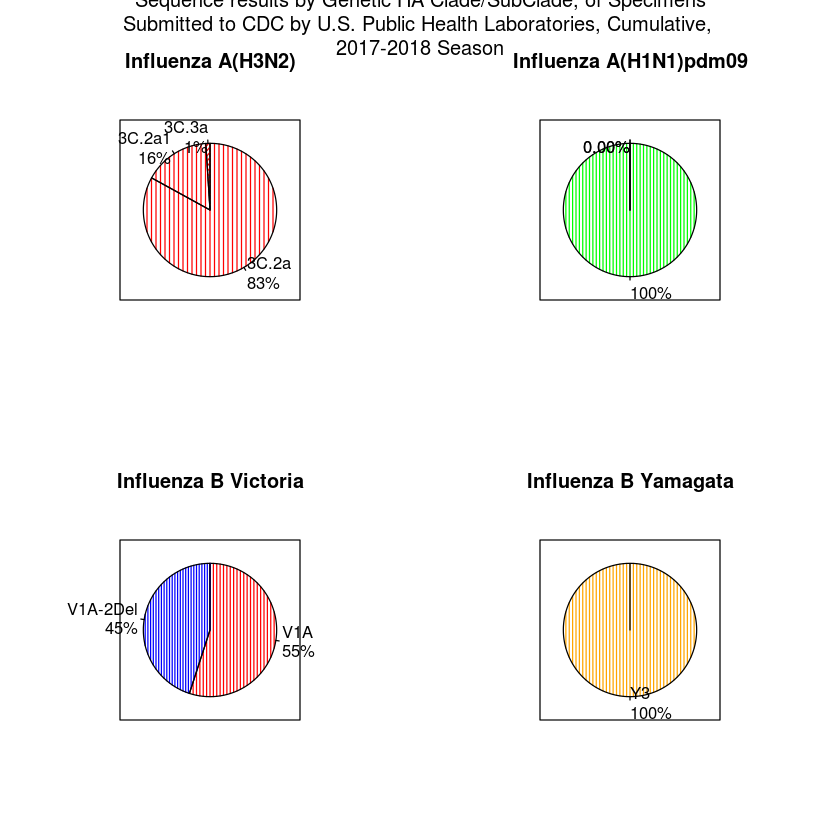

In [519]:
data<- c(sum(posTested$AH3), sum(posTested$A.H1N1.pdm09), 
         sum(posTested$A.Subtyping.not.performed), 
         sum(posTested$BVIC), sum(posTested$BYAM),  sum(posTested$B))
#data

pie(data, clockwise=TRUE, labels=data, col=c("red", "orange", "yellow", "yellowgreen", "green", "darkgreen"), 
    main="Influenza Positive Specimens\n reported by U.S. public heatlth laboratories, \nCumulative 2017-2018 season")

legend("bottomleft", inset=0.05, c("Influenza A(H3N2)", "Influenza A(H1N1)pdm09", 
         "Influenza A(subtype unknown)","Influenza B Victoria",
         "Influenza B Yamagata","Influenza B(lineage not determined"),
      fill=c("red", "orange", "yellow", "yellowgreen", "green", "darkgreen"), cex=0.5)
par(new=FALSE, mai=c(1,1,1,1))
box()
genetic<-read.csv('/home/ketan/Lab1EDA/Genetic04.csv')
genetic$X..of..Sub.type.Total<- gsub("%", "",genetic$X..of..Sub.type.Total) 


H3<- genetic[grep("H3", genetic$X.Sub.type),]
H3<-H3[H3$X..of..Sub.type.Total != "0.00",]

BVIC<-genetic[grep("B/Victoria", genetic$X.Sub.type),]
BVIC<-BVIC[BVIC$X..of..Sub.type.Total != "0.00",]

BYAM<-genetic[grep("B/Yamagata", genetic$X.Sub.type),]
BYAM<-BYAM[BYAM$X..of..Sub.type.Total != "0.00",]

H1<-genetic[grep("H1pdm09", genetic$X.Sub.type),]
H1<-H1[H1$X..of..Sub.type.Total != "0.00"]


H3labels<-paste0(H3$Genetic_Group, "\n", H3$X..of..Sub.type.Total, '%')
BVlabels<-paste0(BVIC$Genetic_Group, "\n",BVIC$X..of..Sub.type.Total, '%')
BYlabels<-paste0(BYAM$Genetic_Group, "\n",BYAM$X..of..Sub.type.Total, '%')
H1labels<-paste0(H1$Genetic_Group, "\n",H1$X..of..Sub.type.Total, '%')


par(mfrow=c(2,2),  new=FALSE, mai=c(1,1,1,1))

pie(as.integer(H3$X..of..Sub.type.Total), clockwise=TRUE, 
    density=c(30,30,40), angle=c(90,90,50),
    col=c("red", "red", "red"), border="black",
  main="Influenza A(H3N2)", labels=H3labels)
box()

pie(as.integer(H1$X..of..Sub.type.Total), clockwise=TRUE, 
    density=c(40,50), angle=c(90,90),
    col=c("green", "blue"), border="black", pch=c(21,24),
   main="Influenza A(H1N1)pdm09", labels=H1labels)
box()

pie(as.integer(BVIC$X..of..Sub.type.Total), clockwise=TRUE, 
    density=c(40,50), angle=c(90,90),
    col=c("red", "blue"), border="black", pch=c(21,24),
   main="Influenza B Victoria", labels=BVlabels)
box()

pie(as.integer(BYAM$X..of..Sub.type.Total), clockwise=TRUE, 
    density=c(40,30,30), angle=c(90,70, 50),
    col=c("orange", "yellowgreen", "green"), border="black", pch=c(21,24),
   main="Influenza B Yamagata", labels=BYlabels)
box()

par(mfrow = c(1,1), new = FALSE, mar=c(2.5,2.5,2.5,2.5))
mtext("Sequence results by Genetic HA Clade/SubClade, of Specimens\nSubmitted to CDC by U.S. Public Health Laboratories, Cumulative, \n2017-2018 Season", side=3)


# Influenza hospitalizations

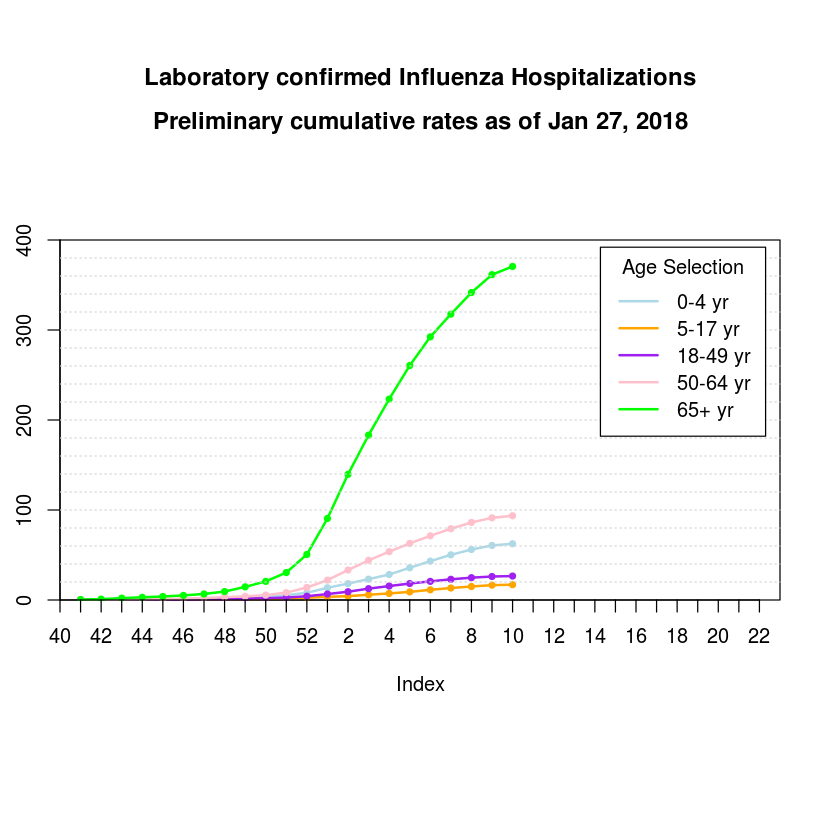

In [584]:
mort<-read.csv('/home/ketan/Lab1EDA/mort.csv')


age1<-mort[grep("0-4 yr", mort$AGE.CATEGORY),]
age2<-mort[grep("5-17 yr", mort$AGE.CATEGORY),]
age3<-mort[grep("18-49 yr", mort$AGE.CATEGORY),]
age4<-mort[grep("50-64 yr", mort$AGE.CATEGORY),]
age5<-mort[grep("65\\+ yr", mort$AGE.CATEGORY),]


par(yaxs='i',xaxs='i', mai=c(2,0.5,2,0.5))
plot(age1$CUMULATIVE.RATE, type="l", pch=20, col="lightblue", ylim=c(0,400), xlim=c(0,35), lwd=2, xaxt='n', 
     main="Preliminary cumulative rates as of Jan 27, 2018")
lines(age1$CUMULATIVE.RATE, type="o", pch=20, col="lightblue")

lines(age2$CUMULATIVE.RATE, type="l", pch=20, col="orange", lwd=2)
lines(age2$CUMULATIVE.RATE, type="o", pch=20, col="orange")


lines(age3$CUMULATIVE.RATE, type="l", pch=20, col="purple", lwd=2)
lines(age3$CUMULATIVE.RATE, type="o", pch=20, col="purple")

lines(age4$CUMULATIVE.RATE, type="l", pch=20, col="pink", lwd=2)
lines(age4$CUMULATIVE.RATE, type="o", pch=20, col="pink")

lines(age5$CUMULATIVE.RATE, type="l", pch=20, col="green", lwd=2)
lines(age5$CUMULATIVE.RATE, type="o", pch=20, col="green")

title('Laboratory confirmed Influenza Hospitalizations\n\n\n', cex=1.2)

grid(nx=NA, ny=20)
legend("topright", inset=0.02, c("0-4 yr","5-17 yr", "18-49 yr", "50-64 yr", "65+ yr"), 
       col=c("lightblue", "orange", "purple", "pink", "green"),
       lty=c(1,1,1,1,1), lwd=c(2,2,2,2,2),
      title="Age Selection")
axis(1, seq(0,34,1), append(age1$MMWR.WEEK,10:22))


# Influenza Heatmap

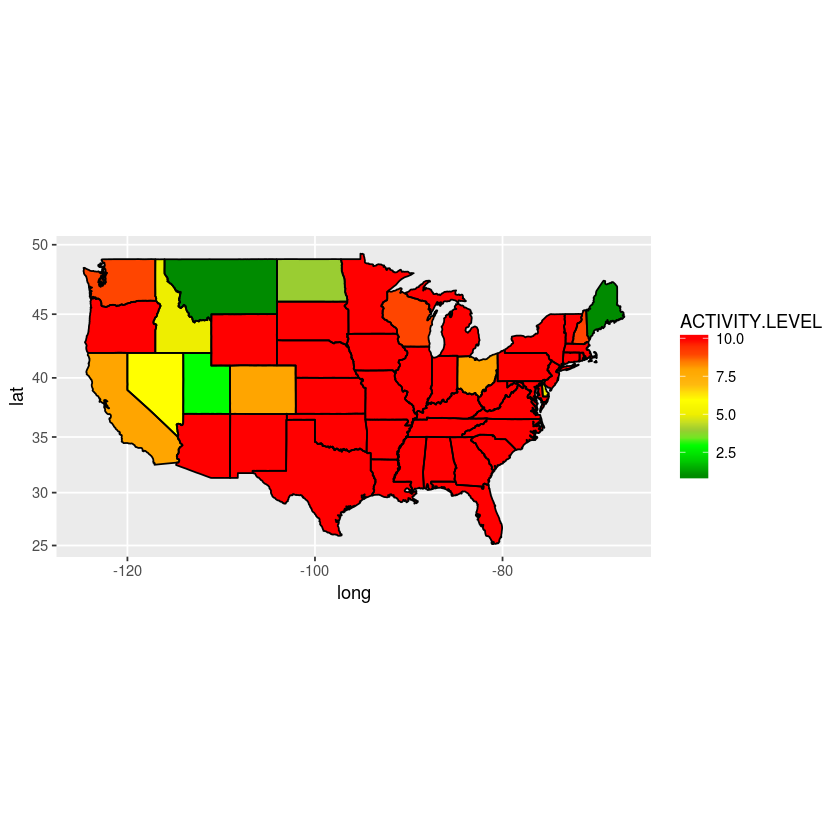

In [606]:
#citation : https://cran.r-project.org/web/packages/fiftystater/vignettes/fiftystater.html

library(ggplot2)
library(maps)
states<-map_data("state")

#states

heatmap = read.csv('/home/ketan/Lab1EDA/heatmap.csv')
heatmap$STATENAME = (tolower(heatmap$STATENAME))
heatmap$region = trimws(heatmap$STATENAME)
heatmap$ACTIVITY.LEVEL = as.integer(gsub("Level ", "", heatmap$ACTIVITY.LEVEL))
heatmap = subset(heatmap, select=-c(STATENAME))
#heatmap

merged<- merge(states,heatmap, by="region", all.x=T)

ggplot(merged, aes(x=long, y=lat, group=group))+
geom_polygon(aes(fill=ACTIVITY.LEVEL))+
  geom_path()+ 
  scale_fill_gradientn(colours=c("green4", "green3","green", "yellowgreen", "yellow2",  "yellow", "darkgoldenrod1", "orange", "orangered", "red"),na.value="white")+
  coord_map()
